In [479]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Note: The following do not work with Python 3.12
#import sweetviz as sv
#import shap
#from ydata_profiling import ProfileReport


seed = 2024  #seed = 2024: train model as stated in example_crisp_dm_pipeline.ipynb
np.random.seed(seed)

# Pre Data Cleaning: Readin data and preprocessing individual table

##### Recipes

In [480]:
df_recipes = pd.read_csv('data/recipes.csv')


non_vegetarian_keywords = list(set([
    'Snail', 'meats', 'kidney', 'cutlets', 'gizzards', 'sweetbreads', 'Breasts', 
    'jowl', 'Mincemeat', 'Roni', 'mortadella', 'blade', 'foie', 'chickens', 'veal',
    'hocks', 'trassi', 'trout', 'Starkist', 'boneless', 'crab', 'perch', 'heart',
    'viande', 'thighs', 'filet', 'calf', 'sirloin', 'masago', 'drumsticks', 'rump',
    'feet', 'pheasant', 'andouille', 'hamburger', 'rib', 'drippings', 'cod', 'ducklings',
    'herring', 'roast', 'goose', 'speck', 'chicken', 'Asada', 'Pork', 'venison', 'catfish',
    'Barbeque', 'quahogs', 'oil-cured', 'clam', 'buffalo', 'brisket', 'shoulder', 'steak', 
    'meat', 'prosciutto', 'caviar', 'partridges', 'meatballs', 'thigh', 'Machaca', 'carcass',
    'bones', 'tuna', 'confit', 'Meatballs', 'lobsters', 'gravy', 'swordfish', 'gizzard',
    'elbow', 'pike', 'halibut', 'snoek', 'yellowfin', 'giblets', 'bacon','skins',
    'elephant', 'bear', 'chopped', 'livers', 'sardine', 'Turkey', 'tenderloin', 'bresaola',
    'breasts', 'lamb', 'liver', 'shin', 'sausages', 'squid', 'tap', 'lox', 'Bacon', 'anchovy',
    'drumstick', 'Ragu', 'shells', 'pancetta', 'serrano', 'Fish', 'tenderloins', 
    'Jello', 'rind', 'legs-thighs', 'Chorizo', 'scallops', 'mussels', 'chihuahua', 'littleneck',
    'neck', 'schnitzel', 'shell', 'lardons', 'whiting', 'Tongue', 'kielbasa', 'clams', 'hearts',
    'Steak', 'ribs', 'joints', 'breast', 'cutlet', 'Jell-O', 'ducks', 'Loin', 'mahi', 'grouper',
    'broiler', 'ham', 'scallop', 'oyster', 'chops', 'gelatin', 'shrimp', 'abalone', 'eel', 'bone',
    'tripe', 'turkey', 'jamon', 'haddock', 'pine', 'channa', 'boned', 'crabs', 'backstraps',
    'Parrot', 'loin', 'Cerdo', 'sausage', 'chop', 'lobster', 'duck', 'sockeye', 'sole', 'albacore',
    'salmon', 'poultry', 'dogs', 'beefsteak', 'blood', 'Swans', 'Gravy', 'chowder', 'suet', 'Ham',
    'Shrimp', 'crayfish', 'fillets', 'salami', 'alligator', 'partridge', 'Duck', 'livestock',
    'necks', 'wieners', 'wings', 'crawfish', 'crabmeat', 'Chicken', 'rabbit', 'pork', 'peg',
    'herrings', 'corned', 'fillet', 'flank', 'flounder', 'pheasants', 'beef', 'Salmon', 'Carne',
    'mince', 'steaks', 'scapes', 'Beef', 'shanks', 'legs', 'beef broth', 
    'chicken broth', 'fish sauce', 'oyster sauce', 'worcestershire sauce', 'caesar dressing', 
    'carbonara sauce', 'béarnaise sauce', 'smoked salmon', 'anchovy paste', 
    'fish stock'

    # maybe vegetarian?
    'Diabetics', 'pierogi', 'porque', 'bologna', 'cut', 'crust', 'tiger', 'Tartar', 'Jelly', 'bouillon',
    'heads', 'Burgers', 'lasagna', 'sushi', 'szechuan', 'Sushi', 'lumpia', 'chicken-flavored', 'marshmallows', 
    'Jam', 'Marshmallow', 'tartar'

]))

non_vegan_keywords = list(set([
    'whip', 'cheeses', 'Remoulade', 'cabrales', 'mayonnaise', 'fontina', 'ranch', 
    'mozzarella-provolone', 'gorgonzola', 'CreamRegular', 'cheesecake', 'edam', 'cheddar',
    'dolcelatte', 'whipped', 'Yoghurt', 'provolone', 'Butter', 'Stilton', 'Cheddar',
    'bocconcini', 'Butter®', 'Roux', 'Appenzeller', 'toffee', 'butterflied', 'Egg', 'Cotija',
    'pecorino', 'Fontina', 'queso', 'Hollandaise', 'Panir', 'bechamel', 'gouda', 'quail',
    'Creme', 'Philadelphia', 'yogurt', 'Buttery', 'cheese', 'Mayonnaise', 'Quark', 'Butter!',
    'robiola', 'butter', 'halloumi', 'gruyere', 'Roquefort', 'parmigiano-reggiano', 'Buttermilk',
    'creamed', 'Cheesecake', 'Limburger', 'mozzarella', 'Velveeta', 'boursin', 'roquefort',
    'ricotta', 'egg', 'margarine', 'butterscotch', 'milk', 'Ranch', 'comte', 'parmigiano',
    'curd', 'camembert', 'Custard', 'fudge', 'Buttercream', 'feta', 'yolks', 'kasseri', 'Parmesan',
    'RICOTTA', 'ranch-style', 'manchego', 'cream', 'Curd', 'eggs', 'ganache', 'Cheese', 'Cream',
    'fat', 'leche', 'Cappuccino', 'burata', 'taleggio', 'parmesan', 'aioli', 'mozzarella-cheddar',
    'mimolette', 'small-curd', 'remoulade', 'ghee', 'Wensleydale', 'mascarpone', 'asadero', 'parmesan-romano',
    'souffle', 'Caramel', 'Labanee', 'Milk', 'full-cream', 'eggnog', 'cottage', 'Pesto', 'eggshells',
    'colby-monterey', 'buttermilk', 'montasio', 'Fat', 'milk chocolate', 'whey protein', 'casein protein', 
    'egg noodles', 'egg whites', 'egg yolks', 'hollandaise sauce', 'egg wash', 'scrambled eggs', 
    'poached eggs', 'hard-boiled eggs', 'deviled eggs', 'eggnog', 'brioche', 'challah', 
    'pound cake', 'sponge cake', 'angel food cake', 'ladyfingers', 'mousse', 'souffle', 
    'creme brulee', 'panna cotta', 'tiramisu', 'yorkshire pudding', 'queso fresco', 'ricotta salata'
    
    # maybe vegan?
    'havarti', "Pie", 'muffins', 'sago', 'Pastry', 'Waffles', 'tart', 'cakes', 'mint-chocolate',
    'Crisco', 'Creamy', 'mostaccioli', 'Brisee', 'Crepes', 'Cake', 'muffin', 'chocolate', 
    'Tart', 'pastry', 'Biscuits', 'Milnot', 'cookies', 'Piecrust', 'mocha', 'praline'

    #vegetarian
    'Snail', 'meats', 'kidney', 'cutlets', 'gizzards', 'sweetbreads', 'Breasts', 
    'jowl', 'Mincemeat', 'Roni', 'mortadella', 'blade', 'foie', 'chickens', 'veal',
    'hocks', 'trassi', 'trout', 'Starkist', 'boneless', 'crab', 'perch', 'heart',
    'viande', 'thighs', 'filet', 'calf', 'sirloin', 'masago', 'drumsticks', 'rump',
    'feet', 'pheasant', 'andouille', 'hamburger', 'rib', 'drippings', 'cod', 'ducklings',
    'herring', 'roast', 'goose', 'speck', 'chicken', 'Asada', 'Pork', 'venison', 'catfish',
    'Barbeque', 'quahogs', 'oil-cured', 'clam', 'buffalo', 'brisket', 'shoulder', 'steak', 
    'meat', 'prosciutto', 'caviar', 'partridges', 'meatballs', 'thigh', 'Machaca', 'carcass',
    'bones', 'tuna', 'confit', 'Meatballs', 'lobsters', 'gravy', 'swordfish', 'gizzard',
    'elbow', 'pike', 'halibut', 'snoek', 'yellowfin', 'giblets', 'bacon','skins',
    'elephant', 'bear', 'chopped', 'livers', 'sardine', 'Turkey', 'tenderloin', 'bresaola',
    'breasts', 'lamb', 'liver', 'shin', 'sausages', 'squid', 'tap', 'lox', 'Bacon', 'anchovy',
    'drumstick', 'Ragu', 'shells', 'pancetta', 'serrano', 'Fish', 'tenderloins', 
    'Jello', 'rind', 'legs-thighs', 'Chorizo', 'scallops', 'mussels', 'chihuahua', 'littleneck',
    'neck', 'schnitzel', 'shell', 'lardons', 'whiting', 'Tongue', 'kielbasa', 'clams', 'hearts',
    'Steak', 'ribs', 'joints', 'breast', 'cutlet', 'Jell-O', 'ducks', 'Loin', 'mahi', 'grouper',
    'broiler', 'ham', 'scallop', 'oyster', 'chops', 'gelatin', 'shrimp', 'abalone', 'eel', 'bone',
    'tripe', 'turkey', 'jamon', 'haddock', 'pine', 'channa', 'boned', 'crabs', 'backstraps',
    'Parrot', 'loin', 'Cerdo', 'sausage', 'chop', 'lobster', 'duck', 'sockeye', 'sole', 'albacore',
    'salmon', 'poultry', 'dogs', 'beefsteak', 'blood', 'Swans', 'Gravy', 'chowder', 'suet', 'Ham',
    'Shrimp', 'crayfish', 'fillets', 'salami', 'alligator', 'partridge', 'Duck', 'livestock',
    'necks', 'wieners', 'wings', 'crawfish', 'crabmeat', 'Chicken', 'rabbit', 'pork', 'peg',
    'herrings', 'corned', 'fillet', 'flank', 'flounder', 'pheasants', 'beef', 'Salmon', 'Carne',
    'mince', 'steaks', 'scapes', 'Beef', 'shanks', 'legs', 'beef broth', 
    'chicken broth', 'fish sauce', 'oyster sauce', 'worcestershire sauce', 'caesar dressing', 
    'carbonara sauce', 'béarnaise sauce', 'smoked salmon', 'anchovy paste', 
    'fish stock'

    # maybe vegetarian?
    'Diabetics', 'pierogi', 'porque', 'bologna', 'cut', 'crust', 'tiger', 'Tartar', 'Jelly', 'bouillon',
    'heads', 'Burgers', 'lasagna', 'sushi', 'szechuan', 'Sushi', 'lumpia', 'chicken-flavored', 'marshmallows', 
    'Jam', 'Marshmallow', 'tartar'

]))


# Consolidated Non-Vegetarian Keywords
'''non_vegetarian_keywords = list(set([
    'flounder', 'lobsters', 'lump', 'rack', 'shank', 'steak', 'scallops', 'alligator', 
    'livers', 'roe', 'ham', 'turkey', 'chicken', 'duck', 'bacon', 'tuna', 'swordfish', 
    'lobster', 'meatballs', 'salmon', 'sweetbreads', 'breasts', 'chicken-flavored', 
    'ducklings', 'drumstick', 'liver', 'shanks', 'rabbit', 'poultry', 'herring', 
    'mussels', 'clams', 'squid', 'pork', 'veal', 'haddock', 'chorizo', 'chihuahua', 
    'eel', 'stuffing', 'cod', 'gelatin', 'sausage', 'curd', 'thighs', 'lox', 'cabbage', 
    'wonton', 'bone', 'giblets', 'pheasant', 'quail', 'shrimp', 'fish', 'sole', 
    'gizzard', 'Canadian', 'pesto', 'truffles', 'anchovies', 'venison', 'pheasants', 
    'tenderloin', 'meats', 'tripe', 'breast', 'wings', 'ribs', 'sausages', 'trout', 
    'oysters', 'octopus', 'crab', 'prawns', 'catfish', 'sardines', 'mahi', 'halibut', 
    'bass', 'perch', 'tilapia', 'grouper'
]))

# Consolidated Non-Vegan Keywords
non_vegan_keywords = list(set([
    'milk', 'cheese', 'butter', 'egg', 'honey', 'mozzarella-cheddar', 'cream', 'whip', 
    'jarlsberg', 'fontina', 'ham', 'cheesecake', 'hollandaise', 'caviar', 'creamRegular', 
    'custard', 'yogurt', 'gouda', 'margarine', 'beef', 'salmon', 'sour', 'bisquick', 
    'carton', 'cotija', 'creme', 'buttercream', 'buttermilk', 'ricotta', 'cottage', 
    'eggs', 'mayonnaise', 'eggshells', 'lactose-free', 'skim', 'ghee', 'mascarpone', 
    'alfredo', 'whey', 'casein', 'lactose', 'albumin', 'bechamel', 'sour cream', 
    'cream cheese', 'feta', 'gorgonzola', 'parmesan', 'mozzarella', 'cheddar', 'brie', 
    'camembert', 'roquefort', 'stilton', 'blue cheese', 'colby', 'monterey jack', 
    'swiss cheese', 'provolone', 'edam', 'havarti', 'pecorino', 'asiago', 'emmental', 
    'gruyere', 'halloumi', 'manchego', 'paneer', 'queso fresco', 'ricotta salata', 
    'romano', 'taleggio', 'vacherin', 'milk chocolate', 'whey protein', 'casein protein', 
    'egg noodles', 'egg whites', 'egg yolks', 'hollandaise sauce', 'aioli', 'flan', 
    'quiche', 'meringue', 'pavlova', 'egg wash', 'frittata', 'omelette', 'scrambled eggs', 
    'poached eggs', 'hard-boiled eggs', 'deviled eggs', 'eggnog', 'brioche', 'challah', 
    'pound cake', 'sponge cake', 'angel food cake', 'ladyfingers', 'mousse', 'souffle', 
    'creme brulee', 'panna cotta', 'tiramisu', 'yorkshire pudding', 'beef broth', 
    'chicken broth', 'fish sauce', 'oyster sauce', 'worcestershire sauce', 'caesar dressing', 
    'carbonara sauce', 'béarnaise sauce', 'gravlax', 'smoked salmon', 'caviar', 'anchovy paste', 
    'fish stock'
]))
'''

# Function to check if a RecipeIngredientParts is vegetarian
def is_vegetarian(ingredient):
    for keyword in non_vegetarian_keywords:
        if keyword in ingredient.lower():
            return False
    return True

# Function to check if a RecipeIngredientParts is vegan
def is_vegan(ingredient):
    for keyword in non_vegan_keywords:
        if keyword in ingredient.lower():
            return False
    return True

# Apply the is_vegetarian function to the RecipeIngredientParts column
df_recipes['is_vegetarian'] = df_recipes['RecipeIngredientParts'].apply(is_vegetarian)

# Apply the is_vegan function to the RecipeIngredientParts column
df_recipes['is_vegan'] = df_recipes['RecipeIngredientParts'].apply(is_vegan)

# Map the diet category based on the is_vegetarian and is_vegan columns
df_recipes['diet_category'] = df_recipes.apply(lambda row: 'Vegetarian' if row['is_vegetarian'] else 'Vegan' if row['is_vegan'] else 'Omnivore', axis=1)

# create TotalTime_Recipe column
df_recipes['TotalTime_Recipe'] = df_recipes['CookTime'] + df_recipes['PrepTime']

# drop columns
df_recipes = df_recipes.drop(columns=['Name', 'CookTime', 'PrepTime', 'RecipeIngredientParts', 'RecipeIngredientQuantities', 'RecipeYield', 'is_vegetarian', 'is_vegan'])
# dtype conversion
df_recipes["RecipeCategory"] = df_recipes["RecipeCategory"].astype("category")
df_recipes["diet_category"] = df_recipes["diet_category"].astype("category")
# rename columns
df_recipes = df_recipes.rename(columns={"diet_category": "recipe_diet_category"})

#df_recipes.info()
#df_recipes.head()

##### Diet

In [481]:
df_diet = pd.read_csv('data/diet.csv')

# chcek for missing values in the data
print(df_diet.isnull().sum())

# replace missing value in Diet with "Omnivore"
print(df_diet["Diet"].unique())
df_diet["Diet"] = df_diet["Diet"].fillna("Omnivore")

# check again
print(df_diet.isnull().sum())

# Change data type of Diet to category
df_diet["Diet"] = df_diet["Diet"].astype("category")

# rename the column Diet to diet_category
df_diet = df_diet.rename(columns={"Diet": "user_diet_category"})

#df_diet.info()
#df_diet.head()


AuthorId    0
Diet        1
Age         0
dtype: int64
['Vegetarian' 'Vegan' 'Omnivore' nan]
AuthorId    0
Diet        0
Age         0
dtype: int64


##### Request

In [482]:
df_requests = pd.read_csv('data/requests.csv')

# check for missing values
print(df_requests.isnull().sum())

#dtype
df_requests['HighCalories'] = df_requests['HighCalories'].astype('boolean')

df_requests['HighProtein'] = df_requests['HighProtein'].replace({'Indifferent': False, 'Yes': True})
df_requests['HighProtein'] = df_requests['HighProtein'].astype('boolean')

df_requests['LowFat'] = df_requests['LowFat'].astype('boolean')

df_requests['LowSugar'] = df_requests['LowSugar'].replace({'Indifferent': False, '0': True})
df_requests['LowSugar'] = df_requests['LowSugar'].astype('boolean')

df_requests['HighFiber'] = df_requests['HighFiber'].astype('boolean')

# rename columns
df_requests.rename(columns={'Time': 'TotalTime_Requested'}, inplace=True)
df_requests.rename(columns={'HighCalories': 'HighCalories_Requested'}, inplace=True)
df_requests.rename(columns={'HighProtein': 'HighProtein_Requested'}, inplace=True)
df_requests.rename(columns={'LowFat': 'LowFat_Requested'}, inplace=True)
df_requests.rename(columns={'LowSugar': 'LowSugar_Requested'}, inplace=True)
df_requests.rename(columns={'HighFiber': 'HighFiber_Requested'}, inplace=True)

#df_requests.info() 
#df_requests.head()


AuthorId        0
RecipeId        0
Time            0
HighCalories    0
HighProtein     0
LowFat          0
LowSugar        0
HighFiber       0
dtype: int64


##### Review

In [483]:
df_reviews = pd.read_csv('data/reviews.csv')

#sns.countplot(data=df_reviews, x='Rating')  # Rating is only 2 except 2 rows -> drop Rating column
df_reviews = df_reviews.drop('Rating', axis=1)

# check for missing values
# print(df_reviews.isnull().sum())

# dtype 
df_reviews['Like'] = df_reviews['Like'].astype('boolean')

#df_reviews.info()
#df_reviews.head()

/var/folders/kd/4w5fjp_536z4vbs4r30zh2ym0000gn/T/ipykernel_49320/2994343210.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reviews = pd.read_csv('data/reviews.csv')


# Data aggregation (Merge the tables)

In [484]:
# keep all request, add info about custormers diet when exit -> df_diet right_join df_requests
merged_df_diet_request = df_diet.merge(df_requests, on='AuthorId', how='right')
#merged_df_diet_request.head(100)

# request without matched recipe, or recipe without request is useless  -> normal join 
merged_df_diet_request_recipes = merged_df_diet_request.merge(df_recipes, on='RecipeId')
#merged_df_diet_request_recipes.tail(100)

# review without request,recipes is useless -> left 
merged_df_diet_request_recipes_reviews = merged_df_diet_request_recipes.merge(df_reviews, on=['RecipeId', 'AuthorId'], how='left')
#merged_df_diet_request_recipes_reviews.info()

merged_df = merged_df_diet_request_recipes_reviews

# Post Data Cleaning (after merged) 

In [485]:
# https://ishanjainoffical.medium.com/choosing-the-right-correlation-pearson-vs-spearman-vs-kendalls-tau-02dc7d7dd01d
def plot_corr(df, title, is_like=True):
    if 'Like' in df:
        df = df[df['Like'] == 1]
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(25, 7))
    nutrients_corr = df.corr(method='kendall') 
    mask = np.triu(np.ones_like(nutrients_corr, dtype=bool))
    cmap = sns.color_palette("coolwarm", as_cmap=True)
    sns.heatmap(nutrients_corr, mask=mask, cmap=cmap, annot=True, fmt=".2f", ax=ax1, center=0)
    ax1.set_title(title + ' - kendall', fontsize=16)
    nutrients_corr = df.corr(method='pearson')
    mask = np.triu(np.ones_like(nutrients_corr, dtype=bool))
    cmap = sns.color_palette("coolwarm", as_cmap=True)
    sns.heatmap(nutrients_corr, mask=mask, cmap=cmap, annot=True, fmt=".2f", ax=ax2, center=0)
    ax2.set_title(title + ' - pearson', fontsize=16)
    plt.show()

In [486]:
# -> Drop unimportant columns 
merged_df = merged_df.drop(columns=['AuthorId', 'RecipeId', 'TotalTime_Requested', 'TotalTime_Recipe', 'RecipeServings', 'RecipeCategory', 'SaturatedFatContent', 'CholesterolContent', 'FiberContent', 'SugarContent', 'LowSugar_Requested', 'HighFiber_Requested', 'CarbohydrateContent'])
# One-Hot_encoding for categorical columns
merged_df = pd.get_dummies(merged_df, columns=['user_diet_category', 'recipe_diet_category'])
# -> Drop unimportant columns 

In [487]:
#merged_df.info()
#merged_df.head()

# Data Spliting : Test - Train - Val 

<span style="color:red">

- randomly split with shuffle=True  (Note: remember the random_state number to be able to reproduce the split) 
- k-cross validation? 

</span>

In [488]:
# TrainVal vs. Test split
test_dataframe = merged_df[merged_df['TestSetId'].notna()]
# how many rows in test_dataframe
test_dataframe.shape[0]

42814

threshold for calories, fat, sodium, protein:  {'Calories': 1302, 'FatContent': 76, 'SodiumContent': 2211, 'ProteinContent': 54}


/Users/doanbachngoc/miniforge3/envs/baml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/doanbachngoc/miniforge3/envs/baml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/doanbachngoc/miniforge3/envs/baml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/doanbachngoc/miniforge3/envs/baml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

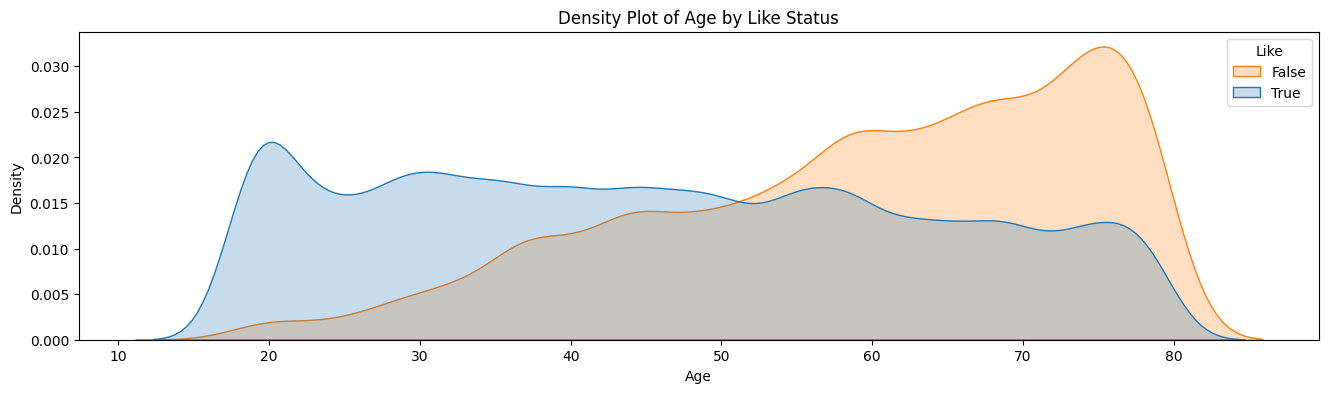

remove  Age                                485
HighCalories_Requested             485
HighProtein_Requested              485
LowFat_Requested                   485
Calories                           485
FatContent                         485
SodiumContent                      485
ProteinContent                     485
Like                               485
user_diet_category_Omnivore        485
user_diet_category_Vegan           485
user_diet_category_Vegetarian      485
recipe_diet_category_Omnivore      485
recipe_diet_category_Vegetarian    485
dtype: int64 duplicate rows
<class 'pandas.core.frame.DataFrame'>
Index: 25385 entries, 57281 to 27791
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              25385 non-null  int64  
 1   HighCalories_Requested           25385 non-null  boolean
 2   HighProtein_Requested            25385 non-null  boolean


In [489]:
from sklearn.model_selection import train_test_split

# Train vs. Val split
train_val_dataframe = merged_df[merged_df['TestSetId'].isna()]

# Prepare train val for training 
train_val_dataframe = merged_df[merged_df['Like'].notna()]
train_val_dataframe = train_val_dataframe.drop('TestSetId', axis=1)

## added by Ngoc: remove nutritions outliers
# Filter 5% outliers for each recipes nutrient
threshold_map = {}
for col in train_val_dataframe.columns:
    if col in ['Calories', 'FatContent', 'SodiumContent', 'ProteinContent']:
        for i in range(10000):
            threshold = i
            percent = (train_val_dataframe[train_val_dataframe[col] > threshold][col].count() / train_val_dataframe[col].count())*100
            if percent <= 5:
                threshold_map[col] = threshold
                break
print("threshold for calories, fat, sodium, protein: ", threshold_map)
train_val_dataframe = train_val_dataframe[train_val_dataframe['Calories'] < threshold_map['Calories']]
train_val_dataframe = train_val_dataframe[train_val_dataframe['FatContent'] < threshold_map['FatContent']]
train_val_dataframe = train_val_dataframe[train_val_dataframe['SodiumContent'] < threshold_map['SodiumContent']]
train_val_dataframe = train_val_dataframe[train_val_dataframe['ProteinContent'] < threshold_map['ProteinContent']]


# Create the KDE plot
plt.figure(figsize=(16, 4))  # Set the size of the plot as needed
sns.kdeplot(data=train_val_dataframe, x='Age', hue='Like', common_norm=False, fill=True)

# Enhancing the plot
plt.title('Density Plot of Age by Like Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Like', labels=['False', 'True'])
plt.show()

# find duplicated rows in the dataframe and drop
print("remove ", train_val_dataframe[train_val_dataframe.duplicated()].count(), "duplicate rows")
train_val_dataframe = train_val_dataframe.drop_duplicates()

# put Target (Like column) at the end 
like_column = train_val_dataframe.pop('Like')
train_val_dataframe['Like'] = like_column
train_val_dataframe['Like'] = train_val_dataframe['Like'].astype(int)
#train_val_dataframe.head(100)



# Drop 70% of the rows where 'Like' is 0 and 'user_diet_category' is 'Vegetarian'
train_val_dataframe = train_val_dataframe.drop(
    train_val_dataframe[(train_val_dataframe['Like'] == 0) & (train_val_dataframe['user_diet_category_Vegetarian'] == 1)].sample(frac=.9, random_state=seed).index
)

#train_val_dataframe = train_val_dataframe.drop(
#    train_val_dataframe[(train_val_dataframe['Like'] == 1) & (train_val_dataframe['user_diet_category_Vegetarian'] == 1)].sample(frac=.2, random_state=seed).index
#)
#train_val_dataframe = train_val_dataframe.drop(
#    train_val_dataframe[(train_val_dataframe['Like'] == 0) & (train_val_dataframe['user_diet_category_Omnivore'] == 1)].sample(frac=.7, random_state=seed).index
#)
#train_val_dataframe = train_val_dataframe.drop(
#    train_val_dataframe[(train_val_dataframe['Like'] == 0) & (train_val_dataframe['user_diet_category_Vegan'] == 1)].sample(frac=.7, random_state=seed).index
#)



# count 0 in train_val_dataframe
train_val_dataframe['Like'].value_counts()

X_train, X_val, y_train, y_val = \
  train_test_split(train_val_dataframe.iloc[:, :-1], train_val_dataframe.iloc[:, -1:],
                   test_size=0.1, 
                   shuffle=True,
                   random_state=3)

X_train.info()
#X_val.head()
#y_train.info()
#y_val.head()

print('Train:')
print(y_train['Like'].value_counts())
print('Val:')
print(y_val['Like'].value_counts())

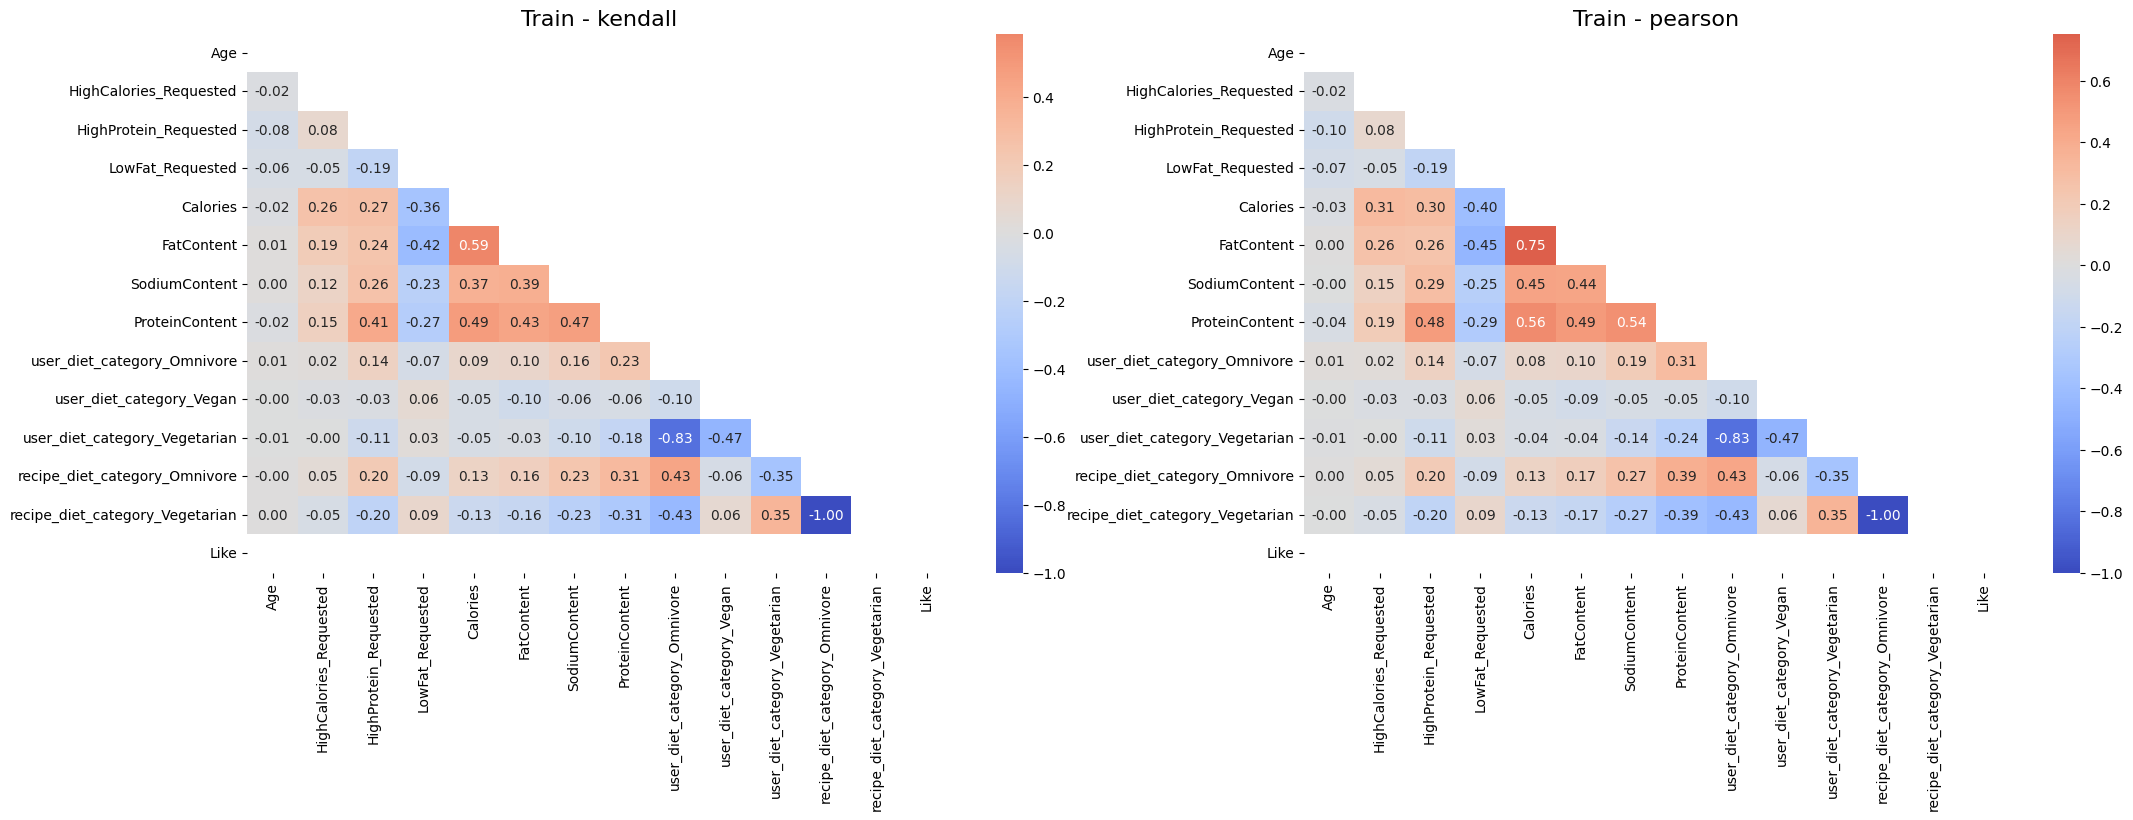

In [490]:
# plott the correlation matrix
plot_corr(train_val_dataframe, 'Train', is_like=True)


# Training

Änderung: 
Bei meta_parameter_grid wurde hinzugefügt:
- parameter_grid_gaussianNB
- parameter_grid_linearSVC

In [491]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import LinearSVC, SVC
# from sklearn.decomposition import PCA

# # Model initialization
# model_logistic_regression = LogisticRegression(max_iter=100)
# model_random_forest = RandomForestClassifier()
# model_gradient_boosting = GradientBoostingClassifier()
# model_gaussianNB = GaussianNB()
# model_linearSVC = LinearSVC(max_iter=10000)
# model_SVC = SVC()

# # Data scaling and PCA
# transform_scaler = StandardScaler()
# transform_pca = PCA()

# # Pipeline setup with PCA
# pipeline = Pipeline([
#     ("scaler", transform_scaler),
#     ("pca", transform_pca),
#     ("model", None)
# ])

# # Update your parameter grids to include PCA options
# # For example, for the Random Forest parameter grid:
# parameter_grid_random_forest = {
#     "pca__n_components": [None],  # None for no PCA, and some other options
#     "model": [model_random_forest],
#     "model__n_estimators": [40, 50, 60, 70],
#     "model__max_depth": [10, 15, 17],
# }

# # Hyperparameters for grid search
# parameter_grid_gaussianNB = {
#     "model": [model_gaussianNB],
#     "model__var_smoothing": [1e-9, 1e-8, 1e-7]
# }

# parameter_grid_SVC = {
#     "model": [model_SVC],
#     "model__C": [1, 10],  # Regularization parameter
#     "model__kernel": ['linear'],  # Start with linear kernel
#     # Uncomment the next line if you want to test the 'rbf' kernel
#     # "model__gamma": [0.1, 1]  # Kernel coefficient for 'rbf'
# }


# parameter_grid_logistic_regression = {
#     "model": [model_logistic_regression],
#     "model__C": [0.1, 1, 10]  # Inverse regularization strength
# }

# parameter_grid_gradient_boosting = {
#     "model": [model_gradient_boosting],
#     "model__n_estimators": [20, 30, 40]
# }

# # Combining all parameter grids
# meta_parameter_grid = [
#     parameter_grid_logistic_regression,
#     parameter_grid_random_forest,
#     parameter_grid_gradient_boosting,
#     parameter_grid_gaussianNB,
#     # parameter_grid_SVC
# ]

# # GridSearchCV setup
# search = GridSearchCV(
#     pipeline,
#     meta_parameter_grid, 
#     scoring="balanced_accuracy",
#     n_jobs=-1, 
#     cv=5,  # Number of folds for cross-validation
#     error_score="raise"
# )

# # Training and grid search
# # Replace X_train and y_train with your actual data
# search.fit(X_train, y_train.values.ravel())

# # Uncomment below to print the best parameters
# print("Best parameters:", search.best_params_, "(CV score=%0.3f)" % search.best_score_)

In [492]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from scipy.stats import randint

def train_model(X_train, y_train):
    """
    Trains a classifier using a pipeline with data scaling, PCA, and RandomizedSearchCV.
    
    Parameters:
    - X_train (array-like): The training data.
    - y_train (array-like): The target labels.
    
    Returns:
    - search (RandomizedSearchCV): The trained RandomizedSearchCV object.
    """
    
    # Data scaling and PCA
    transform_scaler = StandardScaler()
    transform_pca = PCA()

    # Pipeline setup with PCA and a placeholder for the model
    pipeline = Pipeline([
        ("scaler", transform_scaler),
        ("pca", transform_pca),
        ("model", None)  # Placeholder for the model
    ])

    # Parameter grid for Random Forest
    parameter_grid_random_forest = {
        "model": [RandomForestClassifier()],
        "pca__n_components": randint(11, 13),
        "model__n_estimators": randint(70, 140),
        "model__max_depth": randint(10, 25), 
        "model__max_features": ["sqrt"]
    }

    # Parameter grid for Gradient Boosting
    #parameter_grid_gradient_boosting = {
    #    "model": [GradientBoostingClassifier()],
    #    "pca__n_components": randint(5, 14),
    #    "model__n_estimators": randint(5, 35),
    #    "model__max_depth": randint(1, 10),
    #}

    #parameter_grid_gaussianNB = {
    #    "model" : [GaussianNB()],
    #    "model__var_smoothing": np.logspace(-4, -2, 7), 
    #    "pca__n_components": randint(5, 14)
    #}

    #parameter_grid_logistic_regression = {
    #    "model" : [LogisticRegression()],
    #    "model__C" : np.logspace(-3,3,7),
    #    "pca__n_components": randint(5, 14)
    #}

    # Combine parameter grids
    combined_parameter_grid = [parameter_grid_random_forest]

    # RandomizedSearchCV setup
    search = RandomizedSearchCV(
        pipeline,
        combined_parameter_grid,  
        scoring="balanced_accuracy",
        n_jobs=-1, 
        cv=5,
        random_state=42,
        n_iter=50
    )

    # Training and random search
    search.fit(X_train, y_train.values.ravel())

    return search

search = train_model(X_train, y_train)
print("Best parameters:", search.best_params_, "(CV score=%0.3f)" % search.best_score_)

Best parameters: {'model': RandomForestClassifier(), 'model__max_depth': 16, 'model__max_features': 'sqrt', 'model__n_estimators': 121, 'pca__n_components': 11} (CV score=0.822)


# Evaluation

In [493]:
# evaluate performance of model on test set
print("Score on test set:", search.score(X_val, y_val.values.ravel()))

# prediction and show contingency table
ct = pd.crosstab(search.best_estimator_.predict(X_val), y_val.values.ravel(),
                 rownames=["pred"], colnames=["true"])
print(ct)

Score on test set: 0.8301270421378035
true     0    1
pred           
0     1573  216
1      230  802


In [494]:
# (optional, if you're curious) for a detailed look on the performance of the different models
def get_search_score_overview():
  for c,s in zip(search.cv_results_["params"],search.cv_results_["mean_test_score"]):
      print(c, s)

def get_best_five_search_score_overview():
  best_five = []
  for c,s in zip(search.cv_results_["params"],search.cv_results_["mean_test_score"]):
    best_five.append((c, s))
  best_five.sort(key=lambda x: x[1], reverse=True)
  return best_five[:5]

#print(get_search_score_overview())
result = get_best_five_search_score_overview
for i in result():
  print(i)

({'model': RandomForestClassifier(), 'model__max_depth': 16, 'model__max_features': 'sqrt', 'model__n_estimators': 121, 'pca__n_components': 11}, 0.8218044336964946)
({'model': RandomForestClassifier(), 'model__max_depth': 19, 'model__max_features': 'sqrt', 'model__n_estimators': 113, 'pca__n_components': 12}, 0.8216335033463809)
({'model': RandomForestClassifier(), 'model__max_depth': 23, 'model__max_features': 'sqrt', 'model__n_estimators': 117, 'pca__n_components': 11}, 0.8209690184275116)
({'model': RandomForestClassifier(), 'model__max_depth': 20, 'model__max_features': 'sqrt', 'model__n_estimators': 111, 'pca__n_components': 12}, 0.8209592515944065)
({'model': RandomForestClassifier(), 'model__max_depth': 16, 'model__max_features': 'sqrt', 'model__n_estimators': 131, 'pca__n_components': 12}, 0.820786504008953)


In [495]:
"""# compute shapley values
import shap
# assume random forest model
# Best parameters: {'model': RandomForestClassifier(), 'model__max_depth': 16, 'model__max_features': 'sqrt', 'model__n_estimators': 52, 'pca__n_components': 12} (CV score=0.787)
# sclae and pca like in the pipeline
X_train_shap = search.best_estimator_['scaler'].transform(X_train)
X_train_shap = search.best_estimator_['pca'].transform(X_train_shap)
shap_model = RandomForestClassifier(max_depth=16, max_features='sqrt', n_estimators=52)
shap_model.fit(X_train_shap, y_train.values.ravel())
explainer = shap.TreeExplainer(shap_model)
shap_values = explainer.shap_values(X_train_shap)
shap_interaction_values = explainer.shap_interaction_values(X_train_shap)

expected_value = explainer.expected_value
print(expected_value)

# class dependent plots of shapley values for each feature
for i,c in enumerate(train_val_dataframe.variety.unique()):
    shap.summary_plot(shap_values[i], X_train_shap, show=False)
    plt.title("Shapley values for "+str(c))
    plt.show()
"""

'# compute shapley values\nimport shap\n# assume random forest model\n# Best parameters: {\'model\': RandomForestClassifier(), \'model__max_depth\': 16, \'model__max_features\': \'sqrt\', \'model__n_estimators\': 52, \'pca__n_components\': 12} (CV score=0.787)\n# sclae and pca like in the pipeline\nX_train_shap = search.best_estimator_[\'scaler\'].transform(X_train)\nX_train_shap = search.best_estimator_[\'pca\'].transform(X_train_shap)\nshap_model = RandomForestClassifier(max_depth=16, max_features=\'sqrt\', n_estimators=52)\nshap_model.fit(X_train_shap, y_train.values.ravel())\nexplainer = shap.TreeExplainer(shap_model)\nshap_values = explainer.shap_values(X_train_shap)\nshap_interaction_values = explainer.shap_interaction_values(X_train_shap)\n\nexpected_value = explainer.expected_value\nprint(expected_value)\n\n# class dependent plots of shapley values for each feature\nfor i,c in enumerate(train_val_dataframe.variety.unique()):\n    shap.summary_plot(shap_values[i], X_train_shap, 

In [496]:
# prepare test data for prediction
test_set_id = test_dataframe.pop('TestSetId')
test_dataframe = test_dataframe.drop('Like', axis=1)
test_dataframe.head()

,Age,HighCalories_Requested,HighProtein_Requested,LowFat_Requested,Calories,FatContent,SodiumContent,ProteinContent,user_diet_category_Omnivore,user_diet_category_Vegan,user_diet_category_Vegetarian,recipe_diet_category_Omnivore,recipe_diet_category_Vegetarian
5,38,False,True,False,241.3,10.1,13.1,6.7,False,True,False,False,True
7,64,False,False,False,241.3,10.1,13.1,6.7,False,False,True,False,True
8,78,False,False,False,241.3,10.1,13.1,6.7,False,False,True,False,True
14,61,False,True,False,241.3,10.1,13.1,6.7,False,True,False,False,True
15,22,False,True,False,241.3,10.1,13.1,6.7,True,False,False,False,True


In [497]:
# prediction
model = search.best_estimator_ 
test_dataframe["Like"] = model.predict(test_dataframe)

# prediction := List if Like 
# test_set_id := List of test ID

# write to CSV file in the same order  (den Code unten anpassenm)
# 1.ID  1.Like 
# 2.ID  2.Like

output = pd.DataFrame(test_dataframe["Like"])
output["id"] = test_set_id.astype("int")

output = output.rename(columns={'Like': 'prediction'})
output = output.reindex(columns=["id", "prediction"])

output.to_csv('recipe_prediction.csv', index=False)

In [498]:
# check out many 0 and 1 in output
output["prediction"].value_counts()

prediction
0    30009
1    12805
Name: count, dtype: int64